## 1. Import các thư viện cần thiết

In [1]:
from extractMongoDB import *
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
from Preprocessing import *

In [3]:
# df = extract_mongodb()
# df.head()
df = extract_by_date(start_date="2024-04-18",end_date="2024-05-02")
df.head()

,_id,id,area_used,area,bedroom,wc,juridical,date_submitted,link,address,latitude,longitude,describe,seller,seniority,phone,link_seller,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND)
0,6633105e8fb5977205b08640,22539926.0,225.0,45.0,3.0,5.0,Sổ hồng,19/04/2024,https://mogi.vn/quan-go-vap/mua-nha-hem-ngo/ba...,"Thống Nhất, Phường 11, Quận Gò Vấp, TPHCM",10.839189,106.661079,"Mô tả:*DT: 5*9👉 Kết cấu: 5 tầng gồm trệt, lửng...",Châu Minh Tuấn,850.0,908935028.0,https://mogi.vn/moi-gioi/0908935028-chau-minh-...,5.00,9.0,1.0,12.0,12.0,2.0,3.0,3.0,0.0,1.0,17.0,5.0,NaN
1,6633105e8fb5977205b08641,22524911.0,126.0,33.0,5.0,6.0,Sổ hồng,19/04/2024,https://mogi.vn/quan-binh-thanh/mua-nha-hem-ng...,"Lê Quang Định, Phường 7, Quận Bình Thạnh, TPHCM",10.807009,106.691612,"Mô tả:+DT: 3,2x9,5+ Kết cấu: 1 trệt, 1 lửng, 2...",Châu Minh Tuấn,850.0,908935028.0,https://mogi.vn/moi-gioi/0908935028-chau-minh-...,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,NaN
2,6633105e8fb5977205b08642,22521691.0,109.0,63.0,4.0,4.0,Sổ hồng,19/04/2024,https://mogi.vn/quan-binh-thanh/mua-nha-hem-ng...,"Lê Quang Định, Phường 5, Quận Bình Thạnh, TPHCM",10.812072,106.687519,Mô tả: +DT: 4.05*12.5 nở hậu tài Lộc 7.5m; DTC...,Châu Minh Tuấn,850.0,908935028.0,https://mogi.vn/moi-gioi/0908935028-chau-minh-...,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,NaN
3,6633105e8fb5977205b08643,22538386.0,78.0,39.0,2.0,2.0,Sổ hồng,19/04/2024,https://mogi.vn/quan-binh-thanh/mua-nha-hem-ng...,"Bùi Đình Túy, Phường 24, Quận Bình Thạnh, TPHCM",10.805522,106.705147,"Mô tả:Hẻm 1 trục, rộng 3m thông tứ hướng,Nhà 2...",Châu Minh Tuấn,850.0,908935028.0,https://mogi.vn/moi-gioi/0908935028-chau-minh-...,2.80,13.0,1.0,7.0,10.0,4.0,11.0,4.0,0.0,1.0,1.0,7.0,NaN
4,6633105e8fb5977205b08644,22448804.0,300.0,60.0,3.0,4.0,Sổ hồng,19/04/2024,https://mogi.vn/quan-go-vap/mua-nha-hem-ngo/nh...,"Đường 44, Phường 14, Quận Gò Vấp, TPHCM",10.845728,106.644039,+DT : 4x15+ Nhà mới đẹp chủ dọn đi để lại nội ...,Châu Minh Tuấn,850.0,908935028.0,https://mogi.vn/moi-gioi/0908935028-chau-minh-...,4.00,15.0,0.0,12.0,6.0,2.0,3.0,0.0,0.0,2.0,8.0,1.0,NaN


In [4]:
df.shape

(82154, 30)

In [5]:
df.drop(columns=['price(billionVND)'],inplace=True)

In [6]:
df_prices = pd.read_csv('prices.csv')
df_prices.head()
df = df.merge(df_prices, on='id', how='left')

## 2. Tiền xử lý

### 2.1. Xóa những dòng có id trùng nhau

In [7]:
df.drop_duplicates(subset=['id'],inplace=True)

In [8]:
df.shape

(18138, 30)

### 2.2. Đưa về định dạng phù hợp

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18138 entries, 0 to 82150
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 18138 non-null  object 
 1   id                  18138 non-null  float64
 2   area_used           17538 non-null  float64
 3   area                17507 non-null  float64
 4   bedroom             17819 non-null  float64
 5   wc                  17837 non-null  float64
 6   juridical           18138 non-null  object 
 7   date_submitted      18138 non-null  object 
 8   link                16371 non-null  object 
 9   address             18138 non-null  object 
 10  latitude            17839 non-null  float64
 11  longitude           17839 non-null  float64
 12  describe            18138 non-null  object 
 13  seller              18138 non-null  object 
 14  seniority           18138 non-null  float64
 15  phone               18138 non-null  float64
 16  link_sell

In [10]:
df['id'] = df['id'].astype(str).str.split(".").str.get(0)
df = df[df['id']!='nan']
df['id'] = df['id'].astype(int)

In [11]:
df['date_submitted'] = df['date_submitted'].astype('datetime64[ns]')

C:\Users\anhtu\AppData\Local\Temp\ipykernel_2616\2102504825.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_submitted'] = df['date_submitted'].astype('datetime64[ns]')


In [12]:
df['phone'] = df['phone'].astype('str')
df['phone'] = "0" + df['phone'].str.split(".").str.get(0)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18138 entries, 0 to 82150
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   _id                 18138 non-null  object        
 1   id                  18138 non-null  int32         
 2   area_used           17538 non-null  float64       
 3   area                17507 non-null  float64       
 4   bedroom             17819 non-null  float64       
 5   wc                  17837 non-null  float64       
 6   juridical           18138 non-null  object        
 7   date_submitted      18138 non-null  datetime64[ns]
 8   link                16371 non-null  object        
 9   address             18138 non-null  object        
 10  latitude            17839 non-null  float64       
 11  longitude           17839 non-null  float64       
 12  describe            18138 non-null  object        
 13  seller              18138 non-null  object        


### 2.3. Xóa những cột không cần thiết

In [14]:
df.drop(['_id', 'phone','link','describe','link_seller','date_submitted', 'seller'],inplace=True,axis=1)

### 2.4. Điền dữ liệu thiếu

In [15]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                     0.000000
area_used              3.307972
area                   3.478884
bedroom                1.758739
wc                     1.659499
juridical              0.000000
address                0.000000
latitude               1.648473
longitude              1.648473
seniority              0.000000
witdh                  3.478884
length                 3.478884
no_hospital_1km        2.078509
no_school_1km          6.676591
no_cafe_1km            1.201897
no_restaurant_1km      1.201897
no_atm_1km             3.280406
no_bank_1km            1.201897
no_supermarket_1km     1.201897
no_marketplace_1km     1.201897
no_pharmacy_1km       32.423641
no_fuel_1km            1.201897
price(billionVND)      1.411401
dtype: float64

In [16]:
cols_to_fillna = ['no_hospital_1km','no_school_1km','no_cafe_1km','no_restaurant_1km','no_atm_1km','no_bank_1km','no_supermarket_1km','no_marketplace_1km','no_pharmacy_1km','no_fuel_1km']
df[cols_to_fillna] = df[cols_to_fillna].fillna(0)

### 2.5. Tách cột `address`

Remove space begining the address

In [17]:
df['address'] = df['address'].str[1:]

In [18]:
df['address'].str.split(",").str.len().unique()

array([4, 3], dtype=int64)

In [19]:
df['address_district'] = df['address'].str.split(", ").str.get(-2)
df['address_ward'] = df['address'].str.split(", ").str.get(-3)
df['address_street'] = df['address'].str.split(", ").str.get(-4)

In [20]:
df[df['address'].str.split(",").str.len()==3]

,id,area_used,area,bedroom,wc,juridical,address,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street
1803,22349462,296.0,296.0,5.0,5.0,Sổ hồng,"hường Phú Mỹ, Quận 7, TPHCM",10.72440,106.724547,2520.0,11.0,26.7,0.0,11.0,13.0,15.0,5.0,8.0,0.0,0.0,1.0,0.0,110.0,Quận 7,hường Phú Mỹ,NaN
3084,22342229,600.0,182.0,5.0,4.0,Sổ hồng,"hường Phú Mỹ, Quận 7, TPHCM",10.72440,106.724547,2520.0,7.0,26.0,0.0,11.0,13.0,15.0,5.0,8.0,0.0,0.0,1.0,0.0,85.0,Quận 7,hường Phú Mỹ,NaN
4826,20211741,NaN,NaN,5.0,5.0,Sổ hồng,"Đường số 6A, Quận Bình Tân, TP.HCM",10.75017,106.619043,2490.0,NaN,NaN,1.0,9.0,3.0,9.0,5.0,5.0,0.0,3.0,1.0,11.0,8.5,Quận Bình Tân,Đường số 6A,NaN


In [21]:
df.drop(['address'],inplace=True,axis=1)

In [22]:
# Special case
df.loc[df['id']==20211741,'address_street'] = df.loc[df['id']==20211741,'address_ward']
df.loc[df['id']==20211741,'address_ward'] = "Phường Bình Trị Đông B"

In [23]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.000000
area_used             3.307972
area                  3.478884
bedroom               1.758739
wc                    1.659499
juridical             0.000000
latitude              1.648473
longitude             1.648473
seniority             0.000000
witdh                 3.478884
length                3.478884
no_hospital_1km       0.000000
no_school_1km         0.000000
no_cafe_1km           0.000000
no_restaurant_1km     0.000000
no_atm_1km            0.000000
no_bank_1km           0.000000
no_supermarket_1km    0.000000
no_marketplace_1km    0.000000
no_pharmacy_1km       0.000000
no_fuel_1km           0.000000
price(billionVND)     1.411401
address_district      0.000000
address_ward          0.000000
address_street        0.011027
dtype: float64

Điền giá trị thiếu `address_street`

In [24]:
df["address_street"] = df["address_street"].fillna("Unknown")

In [25]:
df[['bedroom','wc']] = df[['bedroom','wc']].fillna(1)

In [26]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.000000
area_used             3.307972
area                  3.478884
bedroom               0.000000
wc                    0.000000
juridical             0.000000
latitude              1.648473
longitude             1.648473
seniority             0.000000
witdh                 3.478884
length                3.478884
no_hospital_1km       0.000000
no_school_1km         0.000000
no_cafe_1km           0.000000
no_restaurant_1km     0.000000
no_atm_1km            0.000000
no_bank_1km           0.000000
no_supermarket_1km    0.000000
no_marketplace_1km    0.000000
no_pharmacy_1km       0.000000
no_fuel_1km           0.000000
price(billionVND)     1.411401
address_district      0.000000
address_ward          0.000000
address_street        0.000000
dtype: float64

Điền giá trị thiếu `latitude` và `longtitude`

In [27]:
lat_lon_null = df[df['latitude'].isnull() & df['longitude'].isnull()]
lat_lon_null.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street
75,22525754,80.0,80.0,3.0,3.0,Sổ hồng,NaN,NaN,760.0,4.0,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.39,Quận 12,Phường Tân Thới Nhất,Tân Thới Nhất 11
85,22523643,101.0,101.0,3.0,2.0,Sổ hồng,NaN,NaN,760.0,4.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.89,Quận 12,Phường Tân Chánh Hiệp,Nguyễn Thị Búp
95,22523557,117.0,117.0,6.0,4.0,Sổ hồng,NaN,NaN,760.0,4.1,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.10,Quận 12,Phường Trung Mỹ Tây,Nguyễn Ảnh Thủ
102,22513589,182.0,182.0,4.0,3.0,Sổ hồng,NaN,NaN,760.0,6.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.00,Huyện Hóc Môn,Xã Trung Chánh,Quang Trung
110,22512790,84.0,84.0,2.0,2.0,Sổ hồng,NaN,NaN,760.0,41.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.89,Quận 12,Phường Đông Hưng Thuận,Trường Chinh


In [28]:
def find_lat_lon(df, address_distric, address_ward, address_street):
    lat_lon_df = df[df['address_district'].str.contains(address_distric) & df['address_ward'].str.contains(address_ward) & df['address_street'].str.contains(address_street)]
    if lat_lon_df['latitude'].isnull().all():
        lat_lon_df = df[df['address_district'].str.contains(address_distric) & df['address_ward'].str.contains(address_ward)]
        if lat_lon_df['latitude'].isnull().all():
            lat_lon_df = df[df['address_district'].str.contains(address_distric)]
    lat = lat_lon_df['latitude'].mean()
    lon = lat_lon_df['longitude'].mean()
    return lat, lon

In [29]:
for index, row in lat_lon_null.iterrows():
    address_distric = row['address_district']
    address_ward = row['address_ward']
    address_street = row['address_street']

    address_distric = address_distric.replace("(","\(")
    address_distric = address_distric.replace(")","\)")
    address_ward = address_ward.replace("(","\(")
    address_ward = address_ward.replace(")","\)")
    address_street = address_street.replace("(","\(")
    address_street = address_street.replace(")","\)")
    lat, lon = find_lat_lon(df, address_distric, address_ward, address_street)
    df.loc[index,'latitude'] = lat
    df.loc[index,'longitude'] = lon

In [30]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.000000
area_used             3.307972
area                  3.478884
bedroom               0.000000
wc                    0.000000
juridical             0.000000
latitude              0.000000
longitude             0.000000
seniority             0.000000
witdh                 3.478884
length                3.478884
no_hospital_1km       0.000000
no_school_1km         0.000000
no_cafe_1km           0.000000
no_restaurant_1km     0.000000
no_atm_1km            0.000000
no_bank_1km           0.000000
no_supermarket_1km    0.000000
no_marketplace_1km    0.000000
no_pharmacy_1km       0.000000
no_fuel_1km           0.000000
price(billionVND)     1.411401
address_district      0.000000
address_ward          0.000000
address_street        0.000000
dtype: float64

In [31]:
df.loc[~df['area_used'].isnull() & df['area'].isnull(), 'area'] = df['area_used']

In [32]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.000000
area_used             3.307972
area                  3.307972
bedroom               0.000000
wc                    0.000000
juridical             0.000000
latitude              0.000000
longitude             0.000000
seniority             0.000000
witdh                 3.478884
length                3.478884
no_hospital_1km       0.000000
no_school_1km         0.000000
no_cafe_1km           0.000000
no_restaurant_1km     0.000000
no_atm_1km            0.000000
no_bank_1km           0.000000
no_supermarket_1km    0.000000
no_marketplace_1km    0.000000
no_pharmacy_1km       0.000000
no_fuel_1km           0.000000
price(billionVND)     1.411401
address_district      0.000000
address_ward          0.000000
address_street        0.000000
dtype: float64

Replace `area_used`, `area`, `width`, `length` còn lại bằng 1

In [33]:
df.fillna(1, inplace=True)

In [34]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.0
area_used             0.0
area                  0.0
bedroom               0.0
wc                    0.0
juridical             0.0
latitude              0.0
longitude             0.0
seniority             0.0
witdh                 0.0
length                0.0
no_hospital_1km       0.0
no_school_1km         0.0
no_cafe_1km           0.0
no_restaurant_1km     0.0
no_atm_1km            0.0
no_bank_1km           0.0
no_supermarket_1km    0.0
no_marketplace_1km    0.0
no_pharmacy_1km       0.0
no_fuel_1km           0.0
price(billionVND)     0.0
address_district      0.0
address_ward          0.0
address_street        0.0
dtype: float64

In [35]:
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

In [36]:
# df.to_csv('17-04_to_02-05.csv',index=False)

## 3. Phân tích rút insight

### 3.1. Những người đăng tin buôn bán BĐS trên đây là những người môi giới thực thụ hay là của chính chủ đăng bán?


#### 🔎 Ý nghĩa khi trả lời được câu hỏi
+ Nếu người bán là chính chủ thì bạn có thể nhận được thông tin trực tiếp từ chính chủ của BĐS về lý do họ muốn bán, lịch sử của BĐS, và các chi tiết khác đầy đủ hơn mà không phải thông qua trung gian.
+ Ngoài ra bạn có thể đàm phán trực tiếp với chính chủ về giá cả và các điều khoản giao dịch mà không phải thông qua một bên thứ ba.
+ Tuy nhiên với người bán là môi giới BDS thì họ có thể cung cấp hỗ trợ và tư vấn trong quá trình tìm kiếm, đàm phán, và hoàn tất giao dịch, giúp bạn tiết kiệm thời gian và công sức.

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Đầu tiên ta sẽ sử dụng hàm pd.cut() để có thể phân loại dữ liệu vào các nhóm dựa trên điều kiện ban đầu mà ta đã đưa ra, ở đây điều kiện ta đưa ra là sẽ dựa theo số ngày thâm niên của người đăng tin.
- Tiếp tục ta sử dụng phương thức `values_counts` để đếm số lượng các đối tượng có cùng mức thâm niêm và gán vào biến `seniority`, với:
    - `seniority_range.index`: thâm niên
    - `seniority_range.values`: số lượng đối tượng

- Tiến hành trực quan hóa bằng barplot trong đó: trục hoành là 'Thâm niên', trục tung sẽ là 'Số lượng'. Và điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

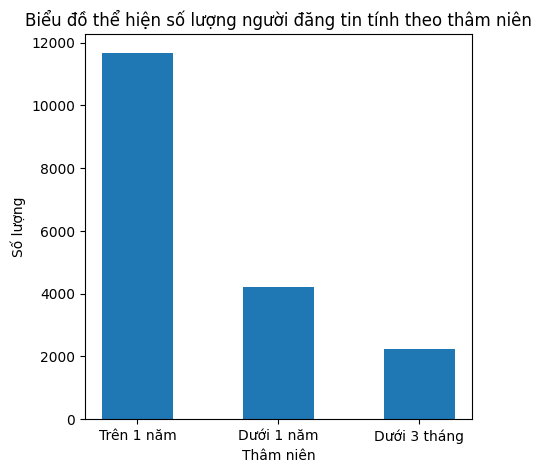

In [37]:
# Phân loại dữ liệu theo điều kiện ban đầu
seniority_range = pd.cut(df['seniority'], bins=[0,90, 365, float('inf')], labels=['Dưới 3 tháng','Dưới 1 năm', 'Trên 1 năm'])
# Tính số lượng trong từng nhóm
group_counts = seniority_range.value_counts()
# Vẽ biểu đồ
plt.subplots(figsize=(5,5))
plt.bar(group_counts.index, group_counts, width = 0.5)
plt.xlabel('Thâm niên')
plt.ylabel('Số lượng')
plt.title('Biểu đồ thể hiện số lượng người đăng tin tính theo thâm niên')
plt.show()

💡 Nhận xét:
- Phần lớn những người đăng tin buôn bán BĐS trên trang web Mogi đều là những người thuộc về đối tượng có thâm niên đăng bài là trên 1 năm.
- Tiếp đến là nhóm đối tượng có thâm niên dưới 1 năm nhưng trên 3 tháng là những người đăng tin nhiều thứ 2.
- Cuối cùng nhóm đối tượng có thâm niên dưới 3 tháng là nhóm đăng tin về BDS ít nhất.
- Nhìn chung ta có thể thấy đa số những người đăng tin buôn bán BĐS đều là những người có thâm niên trong ngành nên có thể suy đoán họ là những người môi giới BĐS.

👉 Để làm rõ hơn vấn đề ta sẽ tiếp tục đi so sánh giá đất trung bình trên / m^2 giữa 2 nhóm đối tượng là có thâm niên lớn hơn 1 năm và thâm niên ít hơn 1 năm.

In [38]:
df['area'].describe()

count    18138.000000
mean       119.454460
std        359.709322
min          1.000000
25%         52.000000
50%         74.000000
75%        120.000000
max      34444.000000
Name: area, dtype: float64

In [39]:
df.drop(df[df['area'] < 10].index, inplace=True)
df['price(billionVND)'].describe()

count    16936.000000
mean        26.916013
std        128.221749
min          0.003500
25%          5.300000
50%          8.900000
75%         22.000000
max       7600.000000
Name: price(billionVND), dtype: float64

In [40]:
df[df['price(billionVND)'] > 1000]

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street
1615,22442886,3050.0,3050.0,3.0,3.0,Sổ hồng,10.780748,106.691662,2400.0,35.0,90.0,8.0,27.0,123.0,179.0,54.0,45.0,0.0,1.0,3.0,7.0,2120.0,Quận 3,Phường 6 (Phường Võ Thị Sáu),Pasteur
2238,22505118,72.0,72.0,3.0,2.0,Không xác định,10.847901,106.781555,116.0,4.0,16.0,3.0,10.0,3.0,7.0,8.0,8.0,0.0,1.0,2.0,4.0,4190.0,Quận 9 (TP. Thủ Đức),Phường Hiệp Phú,Trương Văn Thành
3923,22437840,32.0,32.0,5.0,5.0,Sổ hồng,10.781120,106.704693,330.0,33.0,39.0,2.0,9.0,163.0,217.0,38.0,44.0,0.0,1.0,4.0,4.0,1200.0,Quận 1,Phường Bến Nghé,Mạc Đĩnh Chi
5643,22480372,258.0,68.0,4.0,5.0,Sổ hồng,10.806956,106.605865,725.0,4.0,17.0,0.0,4.0,3.0,2.0,4.0,2.0,0.0,0.0,0.0,3.0,6290.0,Quận Bình Tân,Phường Bình Hưng Hòa,Đường số 15
6387,22537874,90.0,49.0,2.0,1.0,Sổ hồng,10.833191,106.712540,2310.0,4.0,10.0,0.0,3.0,15.0,2.0,1.0,2.0,0.0,1.0,6.0,7.0,3650.0,Quận Thủ Đức (TP. Thủ Đức),Phường Hiệp Bình Chánh,Đường số 7
6531,22304286,90.0,45.0,4.0,3.0,Sổ hồng,10.773942,106.682941,515.0,5.0,13.0,8.0,18.0,73.0,111.0,24.0,33.0,0.0,5.0,4.0,7.0,6500.0,Quận 3,Phường 4,Nguyễn Đình Chiểu
6702,22340776,120.0,40.0,3.0,3.0,Sổ hồng,10.793183,106.674568,515.0,4.0,10.0,5.0,26.0,61.0,42.0,18.0,37.0,0.0,3.0,10.0,6.0,7600.0,Quận Phú Nhuận,Phường 11,Nguyễn Đình Chính
14015,22538180,508.0,508.0,15.0,15.0,Sổ đỏ,10.787884,106.698403,16.0,19.0,27.0,4.0,24.0,96.0,134.0,36.0,38.0,0.0,2.0,0.0,6.0,1100.0,Quận 1,Phường Đa Kao,Nguyễn Đình Chiểu
15668,22444117,3067.0,3067.0,100.0,100.0,Sổ hồng,10.780748,106.691662,665.0,35.0,90.0,8.0,27.0,123.0,179.0,54.0,45.0,0.0,1.0,0.0,7.0,2100.0,Quận 3,Phường 6 (Phường Võ Thị Sáu),Pasteur
16720,22448433,1124.0,1124.0,100.0,100.0,Sổ hồng,10.769385,106.700614,665.0,38.0,42.0,5.0,18.0,210.0,318.0,55.0,91.0,0.0,8.0,0.0,4.0,1800.0,Quận 1,Phường Nguyễn Thái Bình,Hàm Nghi


In [41]:
index_outlier = df[(df['price(billionVND)'] > 1000) & ((df['area'] < 400) | (df['area_used'] < 400))].index
index_outlier

Index([2238, 3923, 5643, 6387, 6531, 6702, 76386], dtype='int64')

In [42]:
df.drop(index_outlier, inplace=True)

In [43]:
df['price_per_square_meters(mil/m2)'] = df['price(billionVND)']/df['area']*1000

In [44]:
#chuẩn bị dữ liệu và chia ra thành 2 nhóm đối tượng tương ứng
seniority_low = df.loc[(df['seniority'] < 365)]
seniority_high = df.loc[(df['seniority'] > 365)]
#tính toán các thông số giá trị đất trung bình cho từng nhóm đối tượng
mean_district_prices_1 = seniority_low.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values()
mean_district_prices_2 = seniority_high.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values()

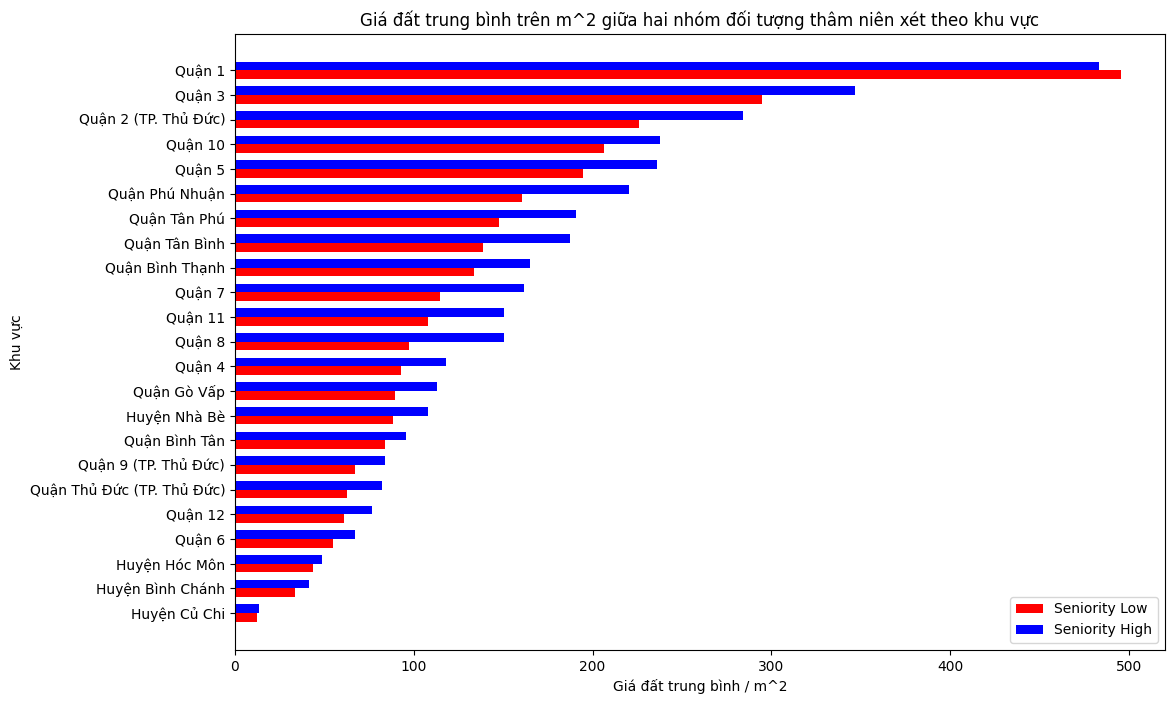

In [45]:
#Tiến hành trực quan biểu đồ
districts = mean_district_prices_1.index
positions = np.arange(len(districts))
plt.figure(figsize=(12, 8))
bar_width = 0.35
plt.barh(positions - bar_width/2, mean_district_prices_1, bar_width, color='red', label='Seniority Low')
plt.barh(positions + bar_width/2, mean_district_prices_2, bar_width, color='blue', label='Seniority High')
plt.yticks(positions, districts)
plt.xlabel('Giá đất trung bình / m^2')
plt.ylabel('Khu vực')
plt.title('Giá đất trung bình trên m^2 giữa hai nhóm đối tượng thâm niên xét theo khu vực')
plt.legend()
plt.show()

💡 Nhận xét:
- Ta có thể dễ dàng nhìn thấy giá bán BĐS của nhóm đối tượng có thâm niên lớn hơn 1 năm thì hầu như hoàn toàn đều cao hơn so với nhóm đối tượng có thâm niên ít hơn 1 năm.
- Từ đây ta có thể nhận ra rằng hầu hết các BĐS được đăng tải bởi các những nhà môi giới chuyên nghiệp thì giá trị của BĐS cũng sẽ có giá trị "nhỉnh" hơn so với mặt bằng chung. 

Lấy một ví dụ cụ thể:

In [46]:
result = df.loc[(df['id'] == 22536184) | (df['id'] ==  22365692)]
result

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street,price_per_square_meters(mil/m2)
4444,22536184,65.0,65.0,3.0,2.0,Sổ hồng,10.844421,106.766338,6.0,5.0,13.0,0.0,16.0,15.0,25.0,16.0,9.0,0.0,1.0,6.0,4.0,1.31,Quận Thủ Đức (TP. Thủ Đức),Phường Bình Thọ,Võ Văn Ngân,20.153846
46948,22365692,67.0,67.0,3.0,3.0,Sổ hồng,10.855231,106.764523,665.0,5.0,13.2,1.0,16.0,17.0,8.0,17.0,9.0,0.0,1.0,7.0,3.0,1.70,Quận Thủ Đức (TP. Thủ Đức),Phường Linh Chiểu,Võ Văn Ngân,25.373134


Ta có thể thấy rằng: 
- Với diện tích tương đương nhau và cùng nằm ở khu vực Thủ Đức - đường Võ Văn Ngân, các tiện ích đi kèm cũng gần như tương đồng với nhau. Tuy nhiên với BĐS được đăng bởi người có thâm niên ít hơn lại có giá rẻ hơn so với người có thâm niên lâu hơn.

### 3.2. Các BĐS được rao bán có diện tích bao nhiêu là phổ biến nhất?

#### 🔎 Ý nghĩa khi trả lời được câu hỏi
+ Thông thường tùy vào nhu cầu sử dụng mà người mua sẽ lựa chọn diện tích BĐS cần mua cho phù hợp. 
+ Trả lời được câu hỏi này ta sẽ biết được diện tích phổ biến của các BĐS hiện nay là bao nhiêu và nó có phù hợp với nhu cầu của thị trường hiện nay hay không. 

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Đầu tiên ta cũng sẽ sử dụng hàm pd.cut() để có thể phân loại dữ liệu vào các nhóm dựa trên điều kiện ban đầu mà ta đã đưa ra, ở đây điều kiện ta đưa ra là sẽ dựa theo diện tích của BĐS.
- Tiếp tục ta sử dụng phương thức `values_counts` để đếm số lượng các BĐS có cùng mức diện tích và gán vào biến `area_range`, với:
    - `area_range.index`: Diện tích
    - `area_range.values`: Số lượng BĐS

- Tiến hành trực quan hóa bằng barplot trong đó: trục hoành là 'Diện tích', trục tung sẽ là 'Số lượng'. Và điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

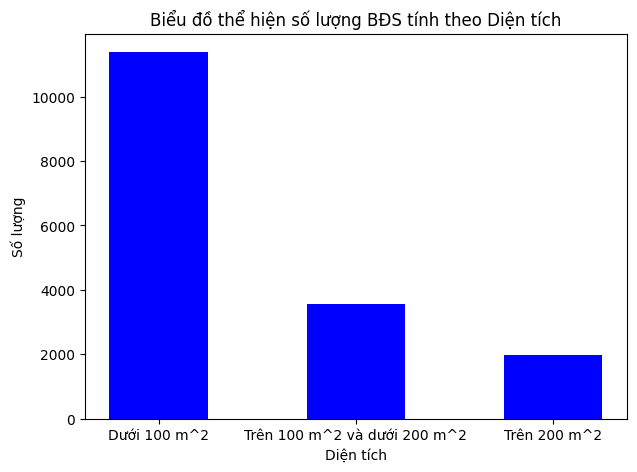

In [47]:
# Phân loại dữ liệu theo điều kiện ban đầu
area_range = pd.cut(df['area'], bins=[0,100,200 ,float('inf')], labels=['Dưới 100 m^2','Trên 100 m^2 và dưới 200 m^2', 'Trên 200 m^2'])
# Tính số lượng trong từng nhóm
group_counts = area_range.value_counts()
# Vẽ biểu đồ
plt.subplots(figsize=(7,5))
plt.bar(group_counts.index, group_counts, width = 0.5, color='blue')
plt.xlabel('Diện tích')
plt.ylabel('Số lượng')
plt.title('Biểu đồ thể hiện số lượng BĐS tính theo Diện tích')
plt.show()

💡 Nhận xét:
- Những BĐS có diện tích dưới 100 m^2 là những BDS được đăng bán nhiều nhất tại TPHCM.
- Nhóm BĐS có diện tích trên 100 m^2 và dưới 200 m^2 là những BĐS được đăng bán nhiều thứ 2.
- Cuối cùng nhóm đối tượng BĐS có diện tích lớn hơn 200 m^2 là những BĐS ít được đăng bán nhất.
- Ta có thể thấy phần lớn nhu cầu về BĐS của người dân tại TPHCM thường sẽ là những BĐS có diện tích vừa phải phù hợp để có thể xây dựng nhà phố.
- Chỉ có một phần người dân sẽ có nhu cầu mua những BĐS có diện tích lớn hơn để có xây dựng những công trình lớn như biệt thự, nhà sân vườn, ...

### 3.3. Tương quan giữa số lượng bedroom, wc với giá nhà

- Thực hiện linear regression giữa các giá trị số lượng bedroom và wc để xác định các giá trị outline

- Vẽ biểu đồ Correlation Matrix Heatmap giữa bedroom, wc với giá nhà

In [48]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

Sử dụng `Linear regresstion` để xác định các giá trị outliers

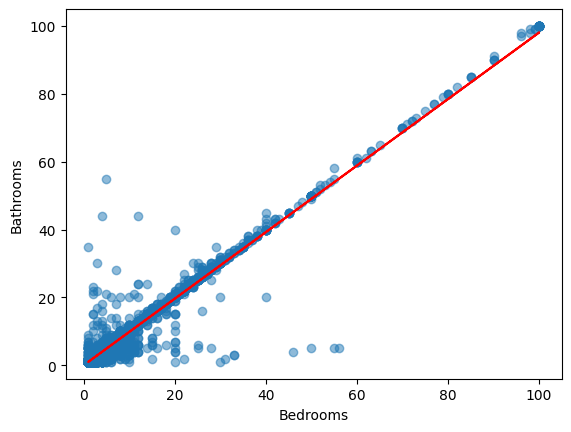

In [49]:
# Use linear regression to plot the line of best fit
model = LinearRegression()
model.fit(df[['bedroom']], df['wc'])
y = model.predict(df[['bedroom']])
plt.scatter(df['bedroom'], df['wc'], alpha=0.5)
plt.plot(df['bedroom'], y, color='red')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

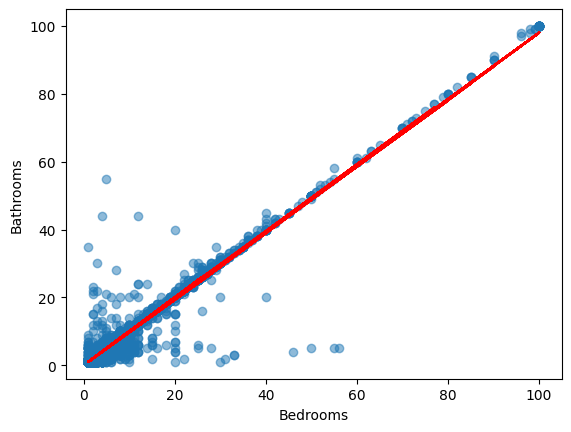

In [50]:
# round the values of the prediction to the nearest whole number
y = [round(i) for i in y]
plt.scatter(df['bedroom'], df['wc'], alpha=0.5)
plt.plot(df['bedroom'], y, color='red')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

Loại bỏ các giá trị `outliers` bằng cách tính `absolute distance` giữa các điểm với đường thẳng linear regression và so sánh với 3 lần độ lệch chuẩn

In [51]:
df['distance'] = abs(df['wc'] - y)
df['distance'].describe()

count    16929.000000
mean         0.627858
std          1.505454
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         50.000000
Name: distance, dtype: float64

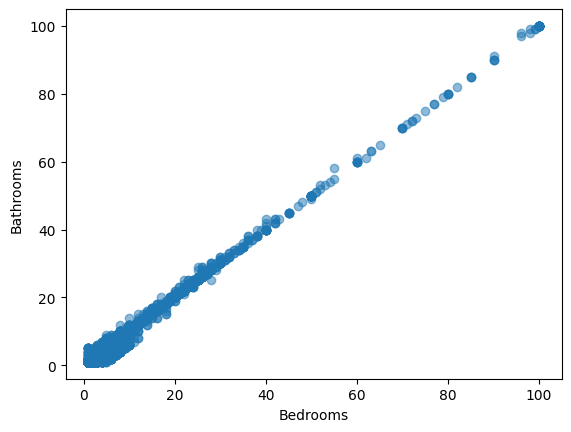

In [52]:
# Remove the outliers which have the distance from the line of best fit greater than 3 standard deviations
filtered_df = df[df['distance'] < 3 * df['distance'].std()]

plt.scatter(filtered_df['bedroom'], filtered_df['wc'], alpha=0.5)
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

In [53]:
filtered_df.shape

(16791, 27)

In [54]:
filtered_df.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street,price_per_square_meters(mil/m2),distance
0,22539926,225.0,45.0,3.0,5.0,Sổ hồng,10.839189,106.661079,850.0,5.00,9.0,1.0,12.0,12.0,2.0,3.0,3.0,0.0,1.0,17.0,5.0,6.50,Quận Gò Vấp,Phường 11,Thống Nhất,144.444444,2.0
1,22524911,126.0,33.0,5.0,6.0,Sổ hồng,10.807009,106.691612,850.0,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,5.10,Quận Bình Thạnh,Phường 7,Lê Quang Định,154.545455,1.0
2,22521691,109.0,63.0,4.0,4.0,Sổ hồng,10.812072,106.687519,850.0,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,6.95,Quận Bình Thạnh,Phường 5,Lê Quang Định,110.317460,0.0
3,22538386,78.0,39.0,2.0,2.0,Sổ hồng,10.805522,106.705147,850.0,2.80,13.0,1.0,7.0,10.0,4.0,11.0,4.0,0.0,1.0,1.0,7.0,4.78,Quận Bình Thạnh,Phường 24,Bùi Đình Túy,122.564103,0.0
4,22448804,300.0,60.0,3.0,4.0,Sổ hồng,10.845728,106.644039,850.0,4.00,15.0,0.0,12.0,6.0,2.0,3.0,0.0,0.0,2.0,8.0,1.0,7.20,Quận Gò Vấp,Phường 14,Đường 44,120.000000,1.0


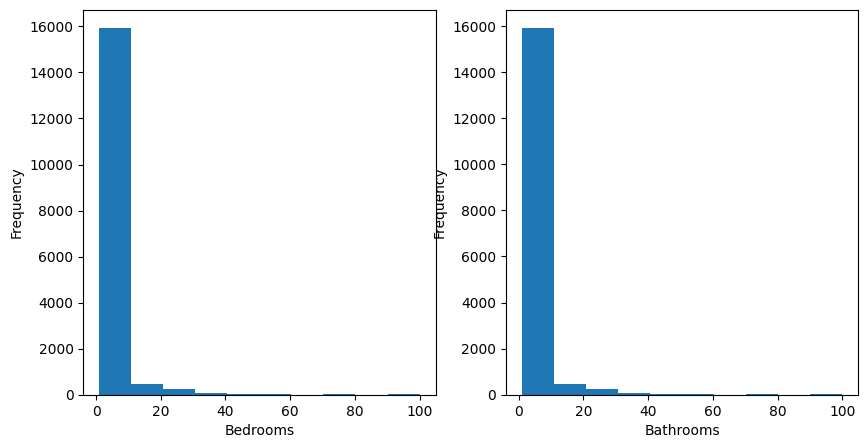

In [55]:
# Histogram of the bedrooms and bathrooms in 2 plots in the same figure
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(filtered_df['bedroom'], bins=10)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(filtered_df['wc'], bins=10)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.show()

Số lượng bedroom và bathroom nhỏ hơn 10 chiếm phần chủ yếu (hơn 90 %) nên có thể chọn filter các dòng có `bedroom` và `wc` nhỏ hơn 10 để phân tích

In [56]:
selected_df = filtered_df[(filtered_df['bedroom'] <= 10) & (filtered_df['wc'] <= 10)]

Tương quan giữa số lượng `bedroom` và `wc` với giá nhà

In [57]:
df_wc_bedroom_price = selected_df[['bedroom', 'wc', 'price(billionVND)']]
df_wc_bedroom_price.head()

,bedroom,wc,price(billionVND)
0,3.0,5.0,6.50
1,5.0,6.0,5.10
2,4.0,4.0,6.95
3,2.0,2.0,4.78
4,3.0,4.0,7.20


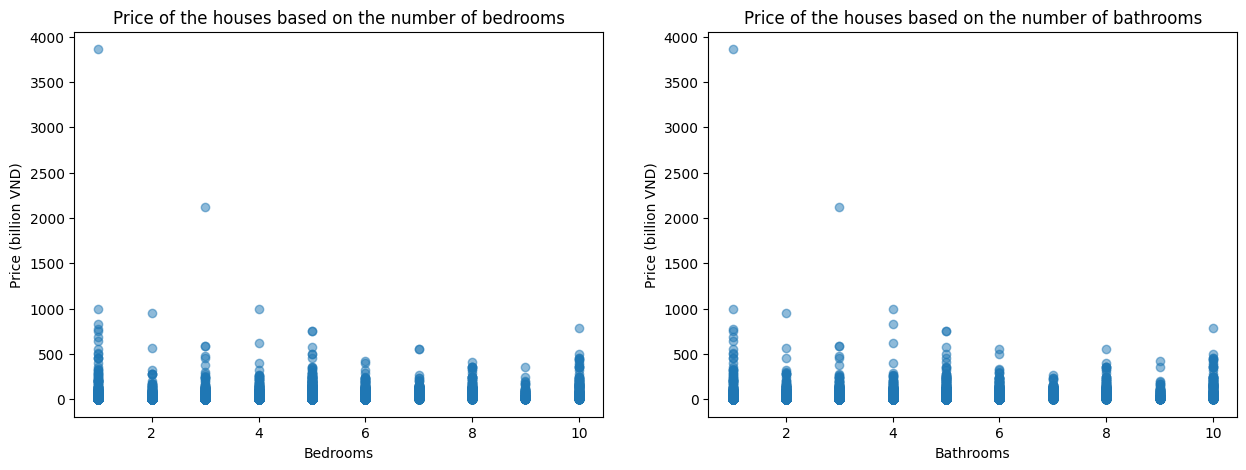

In [58]:
# Plot the price of the houses based on the number of bedrooms
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_wc_bedroom_price['bedroom'], df_wc_bedroom_price['price(billionVND)'], alpha=0.5)
plt.xlabel('Bedrooms')
plt.ylabel('Price (billion VND)')
plt.title('Price of the houses based on the number of bedrooms')
plt.subplot(1, 2, 2)
plt.scatter(df_wc_bedroom_price['wc'], df_wc_bedroom_price['price(billionVND)'], alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Price (billion VND)')
plt.title('Price of the houses based on the number of bathrooms')
plt.show()

Nhìn sơ qua thì thấy được số lượng bedroom và bathroom trong 1 BDS không thực sự thể hiện rõ tác động tới giá nhà

In [59]:
df_wc_bedroom_price['price(billionVND)'].describe()

count    15899.000000
mean        22.008721
std         56.979883
min          0.003500
25%          5.100000
50%          8.400000
75%         19.495000
max       3860.000000
Name: price(billionVND), dtype: float64

Dựa vào các thông số min, 50% như trên, ràng buộc bài toán về khoảng giá nhỏ hơn 20 tỷ

Text(0, 0.5, 'Frequency')

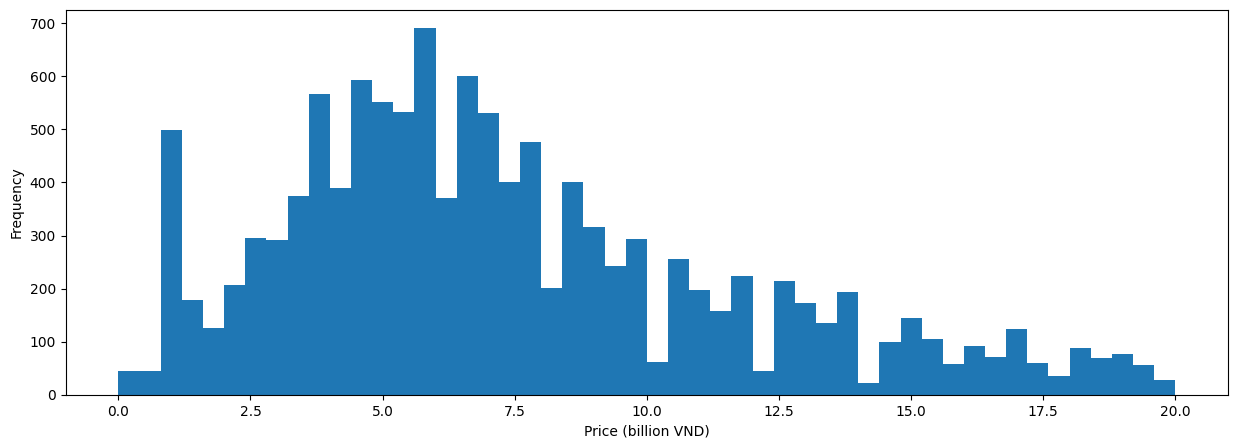

In [60]:
# Histogram of the price of the houses
plt.figure(figsize=(15, 5))
filtered_price_df = df_wc_bedroom_price[df_wc_bedroom_price['price(billionVND)'] < 20]
plt.hist(filtered_price_df['price(billionVND)'], bins=50)
plt.xlabel('Price (billion VND)')
plt.ylabel('Frequency')

Phân chia giá trị BDS như sau:

- LOW: từ 0 đến 5 tỉ
- MEDIUM: từ 5 đến 10 tỉ
- HIGH: từ 10 đến 20 tỉ

In [61]:
# Divide the price of the houses into 3 categories: low, medium, and high
filtered_price_df['price_category'] = pd.cut(filtered_price_df['price(billionVND)'], bins=[0, 5, 10, 20], labels=['low', 'medium', 'high'])
filtered_price_df.value_counts('price_category')

C:\Users\anhtu\AppData\Local\Temp\ipykernel_2616\3173950700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_price_df['price_category'] = pd.cut(filtered_price_df['price(billionVND)'], bins=[0, 5, 10, 20], labels=['low', 'medium', 'high'])


price_category
medium    5262
low       3955
high      2785
Name: count, dtype: int64

C:\Users\anhtu\AppData\Local\Temp\ipykernel_2616\1757845625.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bedroom = filtered_price_df.groupby(['bedroom', 'price_category']).size().unstack()


<Figure size 1500x800 with 0 Axes>

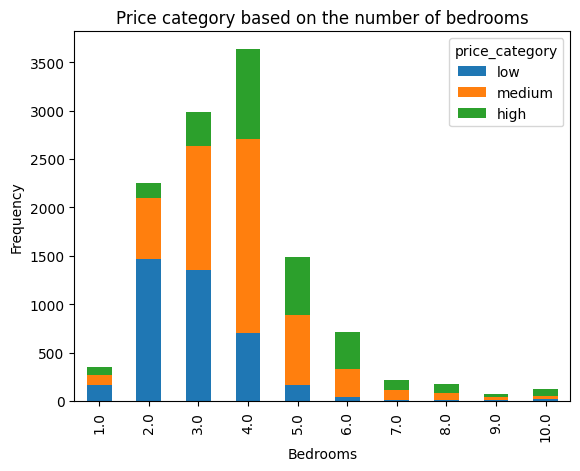

In [62]:
# Plot the stacked bar chart of the price category based on the number of bedrooms
plt.figure(figsize=(15, 8))
price_bedroom = filtered_price_df.groupby(['bedroom', 'price_category']).size().unstack()
price_bedroom.plot(kind='bar', stacked=True)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Price category based on the number of bedrooms')
plt.show()

C:\Users\anhtu\AppData\Local\Temp\ipykernel_2616\748030838.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bathroom = filtered_price_df.groupby(['wc', 'price_category']).size().unstack()


<Figure size 1500x800 with 0 Axes>

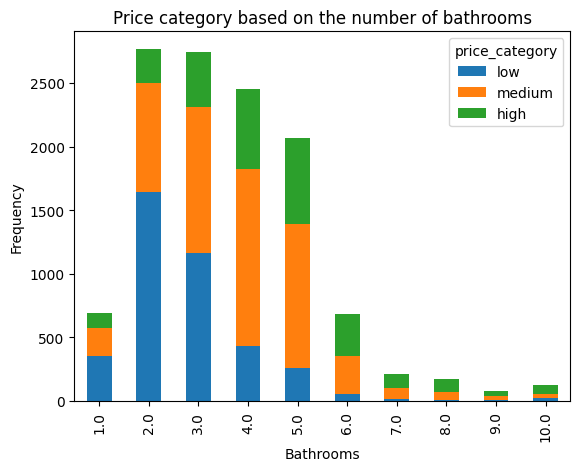

In [63]:
plt.figure(figsize=(15, 8))
price_bathroom = filtered_price_df.groupby(['wc', 'price_category']).size().unstack()
price_bathroom.plot(kind='bar', stacked=True)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Price category based on the number of bathrooms')
plt.show()

Nhận xét:

- Dựa trên biểu đồ trên t thấy được BDS có giá được xếp hạng vào `low` sẽ có số lượng `bedroom` và `bathroom` ít hơn so với các BDS xếp hạng `medium` và `high`
- Tương tự, BDS có số lượng `bedroom` và `bathroom` càng cao thì tỉ lệ giữa số lượng BDS được xếp loại `high` sẽ tăng dần

Rút ra được kết luận số lượng `bedroom` và `bathroom` có ảnh lượng tỉ lệ thuận tới giá trị BDS.

### 3.4. Tương quan giữa giá nhà và các thông số của ngôi nhà

Xử lý `juridical`

In [64]:
df['juridical'].unique()

array(['Sổ hồng', 'Sổ đỏ', 'Hợp đồng mua bán', 'Không xác định',
       'Giấy tờ hợp lệ', 'Giấy tờ viết tay'], dtype=object)

Pháp lý `Không xác định` -> 0, còn lại sẽ trả về 1

In [65]:
df.loc[df['juridical'] != 'Không xác định', 'juridical'] = 1
df.loc[df['juridical'] == 'Không xác định', 'juridical'] = 0

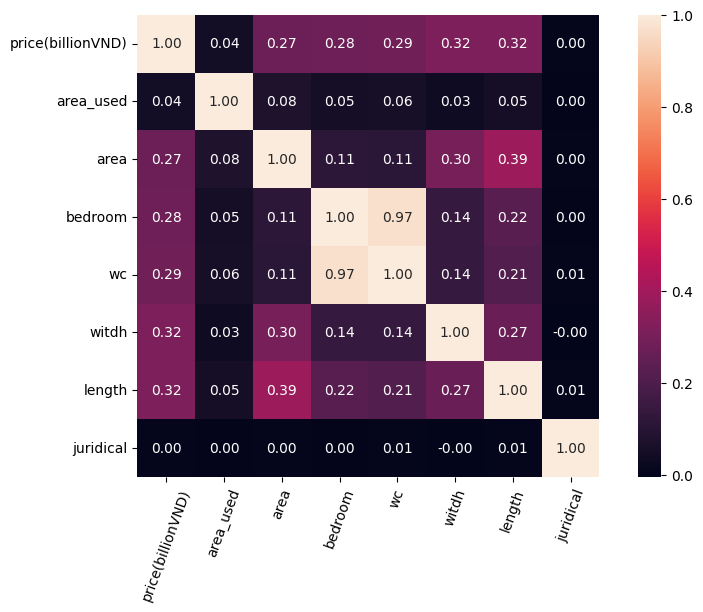

In [66]:
df_params = df[['price(billionVND)','area_used', 'area', 'bedroom', 'wc', 'witdh','length','juridical']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_params.corr(), annot=True, fmt=".2f", square=True)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
- `bedroom` và `wc` có mối tương quan rất mạnh (0.97) -> số lượng phòng ngủ và wc thường đi đôi với nhau trong 1 ngôi nhà
- `price(billionVND)` và các biến khác: Giá nhà `price(billionVND)` có mối tương quan thấp với `area_used` (0.04) nhưng lại có mối tương quan khá mạnh với `area` cũng như là `width` và `length`. `bedroom` và `wc` cũng có mối tương quan mạnh với `price(billionVND)`. Điều đó cho thấy giá nhà phụ thuộc vào diện tích tổng thể cũng như là số phòng ngủ và wc hơn là diện tích sử dụng
- `juridical` có mối tương quan rất thấp với tất cả các biến khác, cho thấy tình hình pháp lý có thể không ảnh hưởng nhiều đến giá nhà hoặc các thông số khác của ngôi nhà.

### 3.5. Mối quan hệ tương quan giữa giá nhà và các tiện ích xung quanh

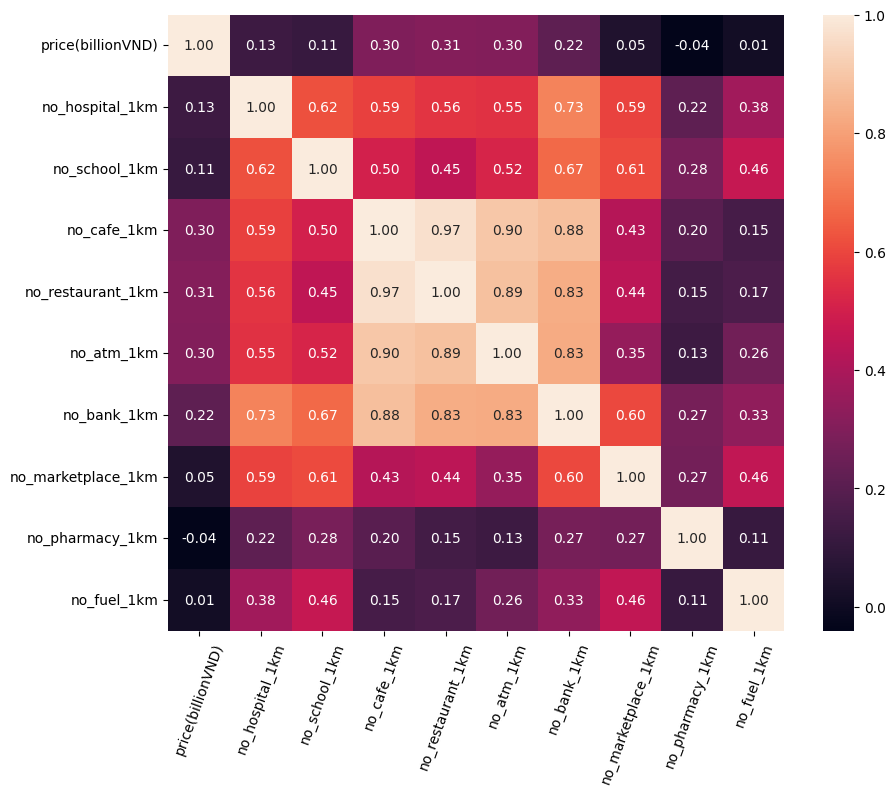

In [67]:
df_around = df[['price(billionVND)','no_hospital_1km',
       'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km', 'no_atm_1km',
       'no_bank_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km']]

plt.figure(figsize=(10, 8))
sns.heatmap(df_around.corr(), annot=True, fmt=".2f", square=True)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
- Có một mối tương quan tích cực giữa giá nhà và số lượng các tiện ích: cà phê (0.3), nhà hàng (0.31), atm(0.3), ngân hàng (0.22). Điều này cho thấy giá nhà gần các tiện ích này thường có giá cao hơn nhà gần các tiện ích khác
- Bệnh viện, trường học và giá nhà: Mối tương quan giữa giá nhà và số lượng bệnh viện (‘no_hospital_1km’: 0.126) hoặc trường học (‘no_school_1km’: 0.114) trong bán kính 1km là tương đối thấp. Điều này có thể cho thấy rằng những tiện ích này không ảnh hưởng nhiều đến giá nhà như các tiện ích khác
- Chợ, hiệu thuốc, trạm xăng và giá nhà: Mối tương quan giữa giá nhà và số lượng chợ (‘no_marketplace_1km’: 0.048), hiệu thuốc (‘no_pharmacy_1km’: -0.040), hoặc trạm xăng (‘no_fuel_1km’: 0.012) trong bán kính 1km rất thấp hoặc gần như không có. Điều này có thể cho thấy rằng những tiện ích này không ảnh hưởng đến giá nhà.
- Giữa các tiện ích với nhau:
    - Có một số mối tương quan mạnh giữa các tiện ích xung quanh, chẳng hạn như ‘no_cafe_1km’ và ‘no_restaurant_1km’ (0.970), ‘no_cafe_1km’ và ‘no_atm_1km’ (0.905), ‘no_restaurant_1km’ và ‘no_atm_1km’ (0.890). Điều này có thể cho thấy rằng các tiện ích thường được đặt gần nhau.

Kết luận: **Vì hệ số tương quan giữa giá nhà và các tiện ích rất thấp (cao nhất là 0.31) nên ngoài số lượng tiện ích còn có những yếu tố khác nữa đang ảnh hưởng đến giá nhà**

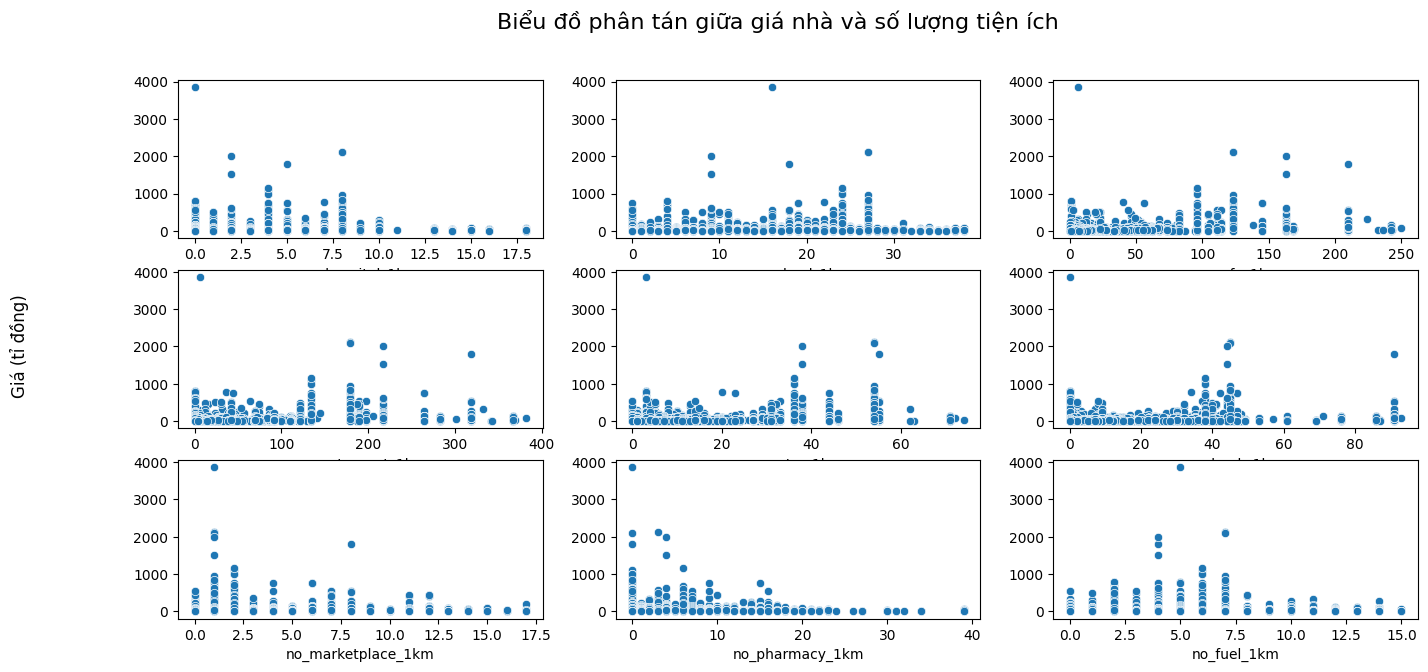

In [69]:
f, ax = plt.subplots(3,3,figsize =(16, 7))
index = 0
for row in range(3):
    for col in range(3):
        sns.scatterplot(x=df_around.columns[1:][index], y='price(billionVND)', data=df, ax=ax[row][col])
        ax[row][col].set_ylabel('')
        index += 1
f.suptitle('Biểu đồ phân tán giữa giá nhà và số lượng tiện ích', fontsize=16)
f.supylabel('Giá (tỉ đồng)')
plt.show()

Nhận xét:
- Tiện ích và giá nhà: Dựa trên biểu đồ, không có mối tương quan mạnh mẽ rõ ràng giữa giá nhà và số lượng các tiện ích như bệnh viện, trường học, cà phê, nhà hàng, ATM, ngân hàng, siêu thị, chợ, hiệu thuốc, và trạm xăng trong bán kính 1km. Điều này có thể cho thấy rằng mặc dù các tiện ích này quan trọng, nhưng chúng có thể không phải là yếu tố duy nhất ảnh hưởng đến giá nhà.
- Phân tán dữ liệu: Dữ liệu trong biểu đồ phân tán rất rộng, cho thấy có sự biến động lớn trong giá nhà cũng như số lượng các tiện ích xung quanh. Điều này có thể phản ánh sự đa dạng của các ngôi nhà và khu vực xung quanh chúng.
- Không có xu hướng rõ ràng: Không có xu hướng tăng hoặc giảm rõ ràng giữa giá nhà và số lượng các tiện ích, cho thấy có thể có các yếu tố khác ngoài số lượng tiện ích ảnh hưởng đến giá nhà.

### 3.6. Giá nhà giữa các khu vực

In [71]:
mean_district_prices = df.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values(ascending=True)
mean_district_prices

address_district
Huyện Củ Chi                   12.461423
Huyện Cần Giờ                  33.962264
Huyện Bình Chánh               40.070465
Huyện Hóc Môn                  48.253037
Quận 12                        65.891059
Quận Thủ Đức (TP. Thủ Đức)     70.932460
Quận 9 (TP. Thủ Đức)           81.300452
Huyện Nhà Bè                   86.249236
Quận 8                         89.878284
Quận Bình Tân                 104.137421
Quận Gò Vấp                   106.584725
Quận Tân Phú                  126.008465
Quận 6                        140.087858
Quận Bình Thạnh               142.597553
Quận 7                        143.046478
Quận Tân Bình                 156.364561
Quận 4                        163.178081
Quận 11                       170.387480
Quận Phú Nhuận                178.249587
Quận 2 (TP. Thủ Đức)          222.525160
Quận 10                       227.888888
Quận 5                        249.718709
Quận 3                        333.538030
Quận 1                        485.843355

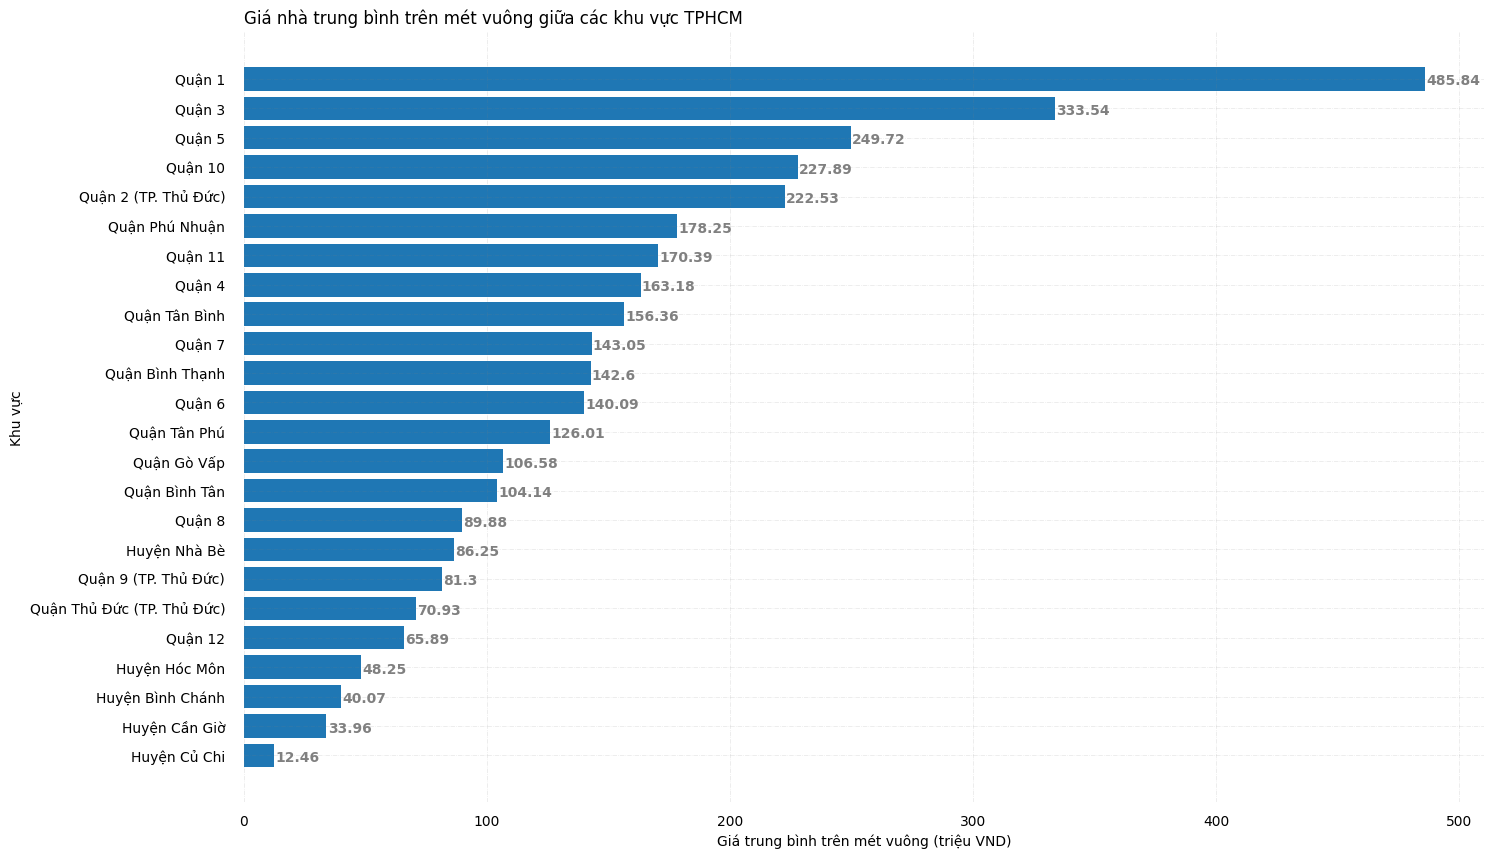

In [72]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(mean_district_prices.index, mean_district_prices)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
# ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Giá nhà trung bình trên mét vuông giữa các khu vực TPHCM', loc ='left')
ax.set_xlabel('Giá trung bình trên mét vuông (triệu VND)')
ax.set_ylabel('Khu vực')
# Show Plot
plt.show()

Nhận xét:
- Sự chênh lệch giá đất giữa các khu vực trung tâm và ngoại thành là rất lớn. Trong khi các quận 1, 3, 5 có giá trên 260 triệu đồng/m2 thì các huyện Hóc Môn, Bình Chánh, Cần Giờ, Củ Chi chỉ dưới 50 triệu đồng/m2.
- Quận 1 có mức giá đất cao nhất thành phố, đạt gần 500 triệu đồng/m2, gấp hơn 40 lần so với quận có mức giá thấp nhất là Huyện Củ Chi (chỉ 12,46 triệu đồng/m2).
- Quận 3 cũng nằm trong nhóm có giá đất cao nhất TP.HCM với ~330 triệu đồng/m2. Quận 5 đứng thứ 3 với hơn 260 triệu đồng/m2.
- Đối với TP Thủ Đức, giá nhà ở quận 2 cao hơn nhiều so với 2 quận còn lại. Lý do là vị trí địa lý quận 2 gần trung tâm thành phố, có nhiều tiện ích và dịch vụ từ nhà hàng sang trọng đến các trung tâm mua sắm. Quận 2 có nhiều dự án bất động sản cao cấp thu hút nhiều nhà đầu tư trong và ngoài nước. Ngoài ra quận 2 có vị trí thuận lợi với nhiều tuyến đường huyết mạch và dự án giao thông trọng điểm như tuyến Metro Bến Thành - Suối Tiên.
    - Thành phố Thủ Đức: Thành phố Hồ Chí Minh đã hợp nhất 3 quận (Quận 2, Quận 9 và Quận Thủ Đức) để tạo thành Thành phố Thủ Đức. Thành phố này được phát triển theo hướng thành phố công nghệ sáng tạo, thu hút các tập đoàn công nghệ đa quốc gia mở rộng sản xuất. Do đó, nhu cầu về căn hộ và nhà ở đối với người nước ngoài và chuyên gia sẽ không ngừng tăng ở Quận 2.
- Các quận trung tâm khác như quận 10, Tân Bình, Bình Thạnh vẫn đạt mức giá cao từ 140-230 triệu đồng/m2.
- Trong số các huyện, huyện Nhà Bè (96 triệu đồng/m2) có giá nhà cao hơn nhiều so với các huyện khác

Nhìn chung, biểu đồ phản ánh rõ nét sự phân hóa giá nhà đất theo vùng địa lý tại TP.HCM, với sự chênh lệch rất lớn giữa trung tâm và ngoại thành, phù hợp với mô hình phát triển kinh tế - xã hội không cân đối giữa các khu vực của thành phố.

##### ❔Tại sao lại có sự chênh lệch giá nhà giữa các quận
- Vị trí địa lý: Các quận trung tâm như Quận 1, Quận 3 thường có giá nhà cao hơn do vị trí thuận lợi, gần các khu vực kinh doanh, thương mại và dịch vụ hấp dẫn.
- Hạ tầng và tiện ích: Các quận phát triển hơn với hệ thống giao thông, hạ tầng xã hội tốt hơn sẽ có giá nhà cao hơn các quận vùng ven.
- Cung cầu nhà đất: Tại các quận trung tâm, nguồn cung nhà đất hạn chế trong khi nhu cầu cao sẽ đẩy giá nhà lên cao.
- Môi trường sống: Các quận có môi trường sống đô thị, an ninh tốt hơn thường được ưa chuộng hơn, từ đó làm tăng giá nhà.

In [76]:
# Thống kê số lượng tiện ích xung quanh giữa các quận
df_sum_around = df.groupby('address_district', as_index=False)[['no_hospital_1km', 'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km',
                                                                'no_atm_1km', 'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km', 'no_pharmacy_1km', 'no_fuel_1km']].mean()
df_sum_around

,address_district,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km
0,Huyện Bình Chánh,0.074074,1.074074,0.092593,0.000000,0.018519,0.000000,0.0,0.148148,0.018519,0.518519
1,Huyện Cần Giờ,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Huyện Củ Chi,0.071429,0.285714,0.142857,0.142857,0.000000,0.000000,0.0,0.071429,0.000000,0.785714
3,Huyện Hóc Môn,0.041958,1.748252,0.265734,0.548951,1.297203,0.360140,0.0,0.650350,0.006993,1.569930
4,Huyện Nhà Bè,0.084416,1.571429,0.233766,0.077922,0.077922,0.642857,0.0,0.006494,0.000000,0.733766
5,Quận 1,3.389414,15.189036,84.804348,126.973535,26.446125,32.844045,0.0,4.034026,3.775992,4.395085
6,Quận 10,8.689492,23.073200,48.227863,59.548996,8.651712,27.724911,0.0,6.025974,7.726092,5.545455
7,Quận 11,2.182203,24.338983,3.635593,9.309322,6.847458,27.720339,0.0,5.237288,2.233051,9.669492
8,Quận 12,0.638489,3.035971,1.327338,0.666367,0.702338,0.483813,0.0,0.740108,0.153777,2.126799
9,Quận 2 (TP. Thủ Đức),0.446429,5.821429,10.648810,18.113095,2.204762,0.172619,0.0,1.307143,0.788095,1.172619


In [78]:
temp_df = df_sum_around[['address_district', 'no_hospital_1km']]

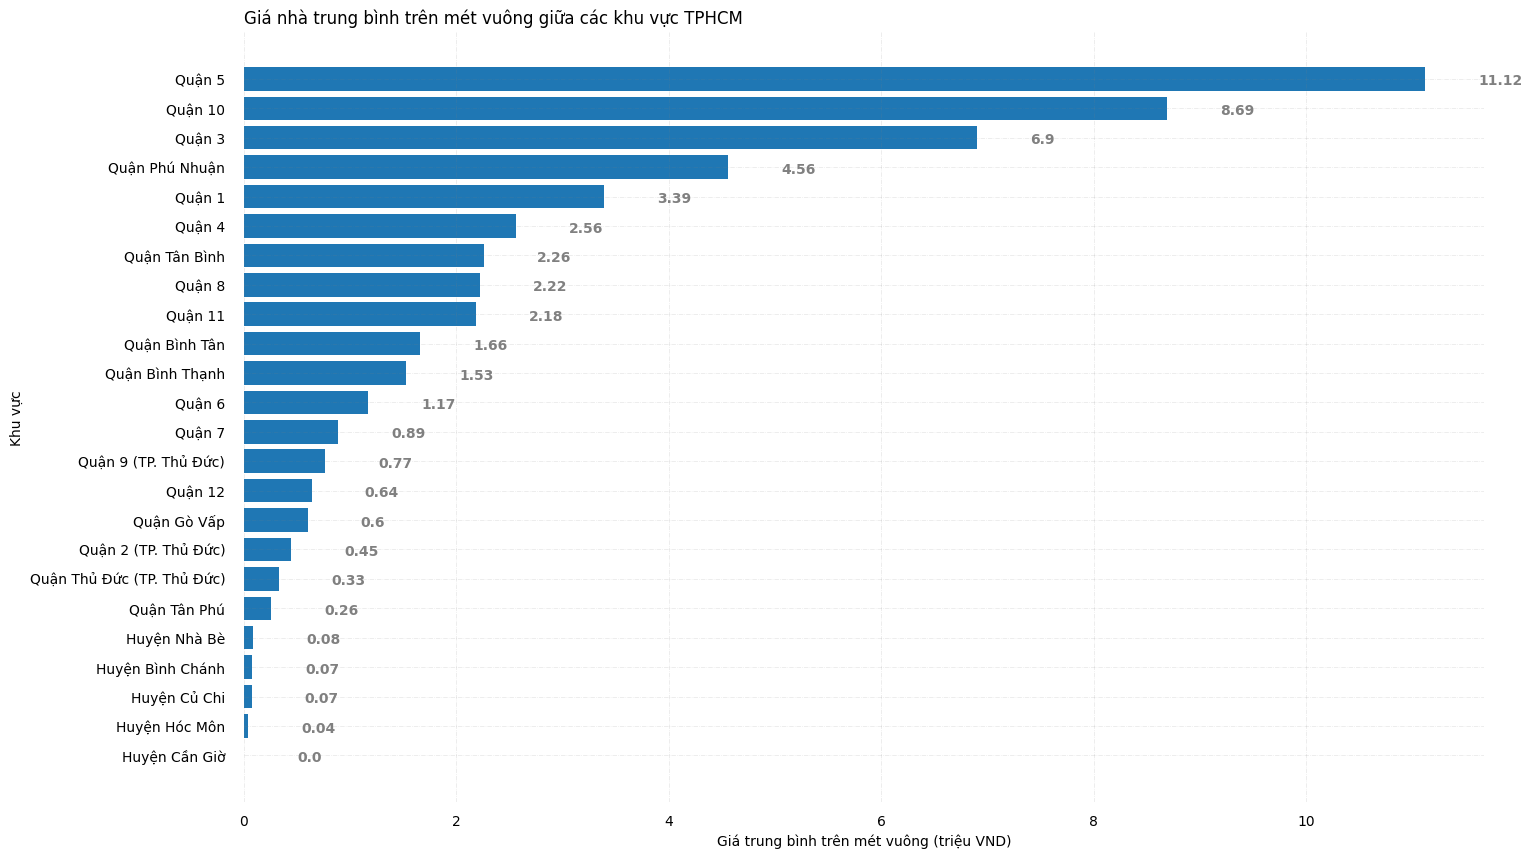

In [86]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
hos_df = df_sum_around[['address_district', 'no_hospital_1km']].sort_values(by='no_hospital_1km', ascending=True)
# Horizontal Bar Plot
ax.barh(hos_df['address_district'], hos_df['no_hospital_1km'].sort_values(ascending=True))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
# ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Giá nhà trung bình trên mét vuông giữa các khu vực TPHCM', loc ='left')
ax.set_xlabel('Giá trung bình trên mét vuông (triệu VND)')
ax.set_ylabel('Khu vực')
# Show Plot
plt.show()

In [79]:
temp_df

,address_district,no_hospital_1km
0,Huyện Bình Chánh,0.074074
1,Huyện Cần Giờ,0.000000
2,Huyện Củ Chi,0.071429
3,Huyện Hóc Môn,0.041958
4,Huyện Nhà Bè,0.084416
5,Quận 1,3.389414
6,Quận 10,8.689492
7,Quận 11,2.182203
8,Quận 12,0.638489
9,Quận 2 (TP. Thủ Đức),0.446429


**Kết luận:** Giá nhà bị ảnh hưởng nhiều bởi vị trí địa lý, diện tích, các tiện ích xung quanh: các bất động sản gần các địa điểm giải trí: cafe, nhà hàng sẽ có giá cao hơn các bất động sản gần các địa điểm còn lại